In [160]:
#Desafio Indicium 2025 - Ciência de Dados

#Objetivo
# Desenvolver um modelo de previsão de preços e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema

#Variáveis
#id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
#nome - Representa o nome do anúncio
#host_id - Representa o id do usuário que hospedou o anúncio
#host_name – Contém o nome do usuário que hospedou o anúncio
#bairro_group - Contém o nome do bairro onde o anúncio está localizado
#bairro - Contém o nome da área onde o anúncio está localizado
#latitude - Contém a latitude do local
#longitude - Contém a longitude do local
#room_type – Contém o tipo de espaço de cada anúncio
#price - Contém o preço por noite em dólares listado pelo anfitri
#minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
#numero_de_reviews - Contém o número de comentários dados a cada listagem
#ultima_review - Contém a data da última revisão dada à listagem
#reviews_por_mes - Contém o número de avaliações fornecidas por mês
#calculado_host_listings_count - Contém a quantidade de listagem por host
#disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

In [ ]:
#Problema

#1: A variáveis independentes que contém no dataset são muito pobres para predizer o preço do produto. 

#Pergunta: E possível enriquecer o banco de dados?
#Análise: Ao verificar os bairros do presentes no dataset oferecido, verificou-se que os bairros são na cidade de Nova York (EUA). O primeiro caminho é verificar se há uma fonte confiável de dados que possam fazer sentido e que enriquecam nossa análise. 
#Abordagem: Nota-se que temos os dados georreferenciados dos airbnbs. A ideia é não só buscar dados abertos, mas dados que sejam georreferenciados. 
#Sabe-se que o preço de um apartamento é valorizado pelas questões intrínsecas ao apto (comôdos, garagem, ano do apto e etc) e extrínsecas (infraestrutura urbana, comércio, acesso e etc). Como dificilmente temos o primeiro, a idéia e enriquecer o dataset com o máximo de informações externas que encontrarmos.


In [ ]:
#Questão Número 1) Faça uma análise exploratória dos dados (EDA), demonstrando as principais  características entre as variáveis e apresentando algumas hipóteses de  negócio relacionadas. Seja criativo! 

In [204]:
#Bibliotecas
import pandas as pd 
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
!pip install contextily
import contextily as ctx
from shapely.wkt import loads

In [27]:
df = pd.read_csv("teste.csv")
df_metro = pd.read_csv("metro.csv")
df_wifi = pd.read_csv("wifi.csv")
df_aeroporto = pd.read_csv("aeroporto.csv")
df_banheiros_publicos = pd.read_csv("banheiros_publicos.csv")
df_bebedouros = pd.read_csv("bebedouros.csv")
df_bike = pd.read_csv("bike_shelter.csv")
df_carsboats = pd.read_csv("carboatsnomobile.csv")
df_combustivel_eletrico = pd.read_csv("eletrico.csv")
df_estacionamentos_municipais = pd.read_csv("estacionamentos municipais.csv")
df_farmacias = pd.read_csv("farmacias.csv")
df_farmers = pd.read_csv("farmers.csv")
df_fumo = pd.read_csv("fumo.csv")
df_galeria = pd.read_csv("galerias.csv")
df_jardim = pd.read_csv("jardim.csv")
df_loteria = pd.read_csv("loteria.csv")
df_museu = pd.read_csv("museu.csv")
df_piscinas = pd.read_csv("piscinas.csv")
df_pistas_gelo = pd.read_csv("pistas.csv")
df_onibus = pd.read_csv("pontosonibus.csv")
df_rotasbike = pd.read_csv("rotasbike.csv")
df_supermercados = pd.read_csv("supermercado.csv")
df_teatro = pd.read_csv("teatros.csv")
df_trem = pd.read_csv("trem.csv")
df_universidades = pd.read_csv("universidades.csv")

In [28]:
#Pontos com Latitude e Longitude

#Primeiramente vamos pegar os pontos georreferenciados de DF (base) e todos os pontos georreferenciados que ja estão em formato 'latitude e longitude'. 

#DF
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf= gpd.GeoDataFrame(df, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(epsg=3857)

#Banheiros Publicos
geometry = [Point(xy) for xy in zip(df_banheiros_publicos['Longitude'], df_banheiros_publicos['Latitude'])]
gdf_banheiros_publicos = gpd.GeoDataFrame(df_banheiros_publicos, geometry=geometry)
gdf_banheiros_publicos.set_crs(epsg=4326, inplace=True)
gdf_banheiros_publicos = gdf_banheiros_publicos.to_crs(epsg=3857)

#Farmacia
geometry = [Point(xy) for xy in zip(df_farmacias['Longitude'], df_farmacias['Latitude'])]
gdf_farmacias = gpd.GeoDataFrame(df_farmacias, geometry=geometry)
gdf_farmacias.set_crs(epsg=4326, inplace=True)
gdf_farmacias = gdf_farmacias.to_crs(epsg=3857)

#Farmers
geometry = [Point(xy) for xy in zip(df_farmers['Longitude'], df_farmers['Latitude'])]
gdf_farmers = gpd.GeoDataFrame(df_farmers, geometry=geometry)
gdf_farmers.set_crs(epsg=4326, inplace=True)
gdf_farmers = gdf_farmers.to_crs(epsg=3857)

#Pontos de Onibus
geometry = [Point(xy) for xy in zip(df_onibus['Longitude'], df_onibus['Latitude'])]
gdf_onibus = gpd.GeoDataFrame(df_onibus, geometry=geometry)
gdf_onibus.set_crs(epsg=4326, inplace=True)
gdf_onibus = gdf_onibus.to_crs(epsg=3857)

#Pontos de venda de loteria
df_loteria = df_loteria[df_loteria['City'] == 'NEW YORK']
df_loteria.head()
geometry = [Point(xy) for xy in zip(df_loteria['Longitude'], df_loteria['Latitude'])]
gdf_loteria = gpd.GeoDataFrame(df_loteria, geometry=geometry)
gdf_loteria.set_crs(epsg=4326, inplace=True)
gdf_loteria = gdf_loteria.to_crs(epsg=3857)

#Estações de Metro
geometry = [Point(xy) for xy in zip(df_metro['Longitude'], df_metro['Latitude'])]
gdf_metro = gpd.GeoDataFrame(df_metro, geometry=geometry)
gdf_metro.set_crs(epsg=4326, inplace=True)
gdf_metro = gdf_metro.to_crs(epsg=3857)

#Pontos de Wi-Fi
geometry = [Point(xy) for xy in zip(df_wifi['LONGITUDE'], df_wifi['LATITUDE'])]
gdf_wifi = gpd.GeoDataFrame(df_wifi, geometry=geometry)
gdf_wifi.set_crs(epsg=4326, inplace=True)
gdf_wifi = gdf_wifi.to_crs(epsg=3857)

In [29]:
#Transformacoes 

#As coordenadas geográficas para Galerias de Arte, Estações de Trem, Museu, Estacionamentos publicos de bicicleta, Jardins urbanos, universidades, 
#estacionamentos municipais e bebedouros publicos estão em um formato "the_geom". Precisei transformar eles em Latitude e Longitude e pegar os pontos relativos de cada um.

df_galeria['geometry'] = df_galeria['the_geom'].apply(loads) #Galeria
gdf_galeria = gpd.GeoDataFrame(df_galeria, geometry='geometry') #Galeria
gdf_galeria.set_crs(epsg=4326, inplace=True) #Galeria
gdf_galeria = gdf_galeria.to_crs(epsg=3857)

df_trem['geometry'] = df_trem['the_geom'].apply(loads) #Trem
gdf_trem = gpd.GeoDataFrame(df_trem, geometry='geometry') #Trem
gdf_trem.set_crs(epsg=4326, inplace=True) #Trem
gdf_trem = gdf_trem.to_crs(epsg=3857)

df_museu['geometry'] = df_museu['the_geom'].apply(loads) #Museu
gdf_museu = gpd.GeoDataFrame(df_museu, geometry='geometry') #Museu
gdf_museu.set_crs(epsg=4326, inplace=True) #Museu
gdf_museu = gdf_museu.to_crs(epsg=3857)

df_bike['geometry'] = df_bike['the_geom'].apply(loads) #Bike Shelter
gdf_bike = gpd.GeoDataFrame(df_bike, geometry='geometry') #Bike Shelter
gdf_bike.set_crs(epsg=4326, inplace=True) #Bike Shelter
gdf_bike = gdf_bike.to_crs(epsg=3857)

df_jardim['geometry'] = df_jardim['the_geom'].apply(loads) #Jardim
gdf_jardim = gpd.GeoDataFrame(df_jardim, geometry='geometry') #Jardim
gdf_jardim.set_crs(epsg=4326, inplace=True) #Jardim
gdf_jardim = gdf_jardim.to_crs(epsg=3857)

df_universidades['geometry'] = df_universidades['the_geom'].apply(loads) #Universidades
gdf_universidades = gpd.GeoDataFrame(df_universidades, geometry='geometry') #Universidades
gdf_universidades.set_crs(epsg=4326, inplace=True) #Universidades
gdf_universidades = gdf_universidades.to_crs(epsg=3857)

df_estacionamentos_municipais['geometry'] = df_estacionamentos_municipais['the_geom'].apply(loads) #Estacionamentos Municipais
gdf_estacionamentos = gpd.GeoDataFrame(df_estacionamentos_municipais, geometry='geometry') #Estacionamentos Municipais
gdf_estacionamentos.set_crs(epsg=4326, inplace=True) #Estacionamentos Municipais
gdf_estacionamentos = gdf_estacionamentos.to_crs(epsg=3857)

df_bebedouros['geometry'] = df_bebedouros['Point'].apply(loads) #Bebedouros
gdf_bebedouros = gpd.GeoDataFrame(df_bebedouros, geometry='geometry') #Bebedouros
gdf_bebedouros.set_crs(epsg=4326, inplace=True) #Bebedouros
gdf_bebedouros = gdf_bebedouros.to_crs(epsg=3857)

df_teatro['geometry'] = df_teatro['the_geom'].apply(loads) #Bebedouros
gdf_teatro = gpd.GeoDataFrame(df_teatro, geometry='geometry') #Bebedouros
gdf_teatro.set_crs(epsg=4326, inplace=True) #Bebedouros
gdf_teatro = gdf_teatro.to_crs(epsg=3857)

In [97]:
#Criando Buffers de 500mt sobre o ponto em GDF

# Banheiros Publicos
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Banheiros Publicos'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_banheiros_publicos[gdf_banheiros_publicos.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#farmacias
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Farmacias'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_farmacias[gdf_farmacias.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Farmers
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Farmers'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_farmers[gdf_farmers.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Loteria
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Loteria'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_loteria[gdf_loteria.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Onibus
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Onibus'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_onibus[gdf_onibus.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)
print(gdf)

# Galeria
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Galeria'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_galeria[gdf_galeria.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Trem
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Trem'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_trem[gdf_trem.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Museu
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Museu'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_museu[gdf_museu.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#bike
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Bike'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_bike[gdf_bike.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Jardim
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Jardim'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_jardim[gdf_jardim.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Universidades
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Universidades'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_universidades[gdf_universidades.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Estacionamentos
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Estacionamentos'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_estacionamentos[gdf_estacionamentos.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Bebedouros
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Bebedouros'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_bebedouros[gdf_bebedouros.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Metro
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['Metro'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_metro[gdf_metro.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Wifi
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['wifi'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_wifi[gdf_wifi.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

#Metro
gdf['buffer_500m'] = gdf.geometry.buffer(500)
gdf['teatro'] = gdf['buffer_500m'].apply(
    lambda buf: gdf_teatro[gdf_teatro.geometry.within(buf)].shape[0])
gdf.drop(columns=['buffer_500m'], inplace=True)

print(gdf)

             id                                               nome   host_id  \
0          2595                              Skylit Midtown Castle      2845   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
2          3831                    Cozy Entire Floor of Brownstone      4869   
3          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
4          5099          Large Cozy 1 BR Apartment In Midtown East      7322   
...         ...                                                ...       ...   
48889  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48890  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48891  36485431            Sunny Studio at Historical Neighborhood  23492952   
48892  36485609               43rd St. Time Square-cozy single bed  30985759   
48893  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name bairro_group      

In [98]:
#Adicionando as colunas no frame DF
new_columns = [
    'Banheiros Publicos', 'Farmacias', 'Farmers', 'Loteria', 'Onibus',
    'Galeria', 'Trem', 'Museu', 'Bike', 'Jardim',
    'Universidades', 'Estacionamentos', 'Bebedouros', 'Metro', 'teatro', 'wifi'
]
df[new_columns] = gdf[new_columns]
print(df.head())


     id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  ...  Trem  Museu Bike  Jardim  Universidades  \
0  Entire home/apt    225  ...     0      1    0       0              1   
1     Private room    150  ...  

In [138]:
#Salvando dataframes em CSV 
import pandas as pd

# Salvar o DataFrame em CSV
df.to_csv("df.csv", index=False)

print("Arquivo df.csv criado com sucesso!")
df = pd.read_csv("df.csv")

# Criar uma cópia de df
df2 = df.copy()

# Salvar df2 como CSV
df2.to_csv("df2.csv", index=False)

print("Arquivo df2.csv criado com sucesso!")


Arquivo df.csv criado com sucesso!
Arquivo df2.csv criado com sucesso!


In [201]:
#Análise Exploratória de Dados 

# 1) Qual a Média de Preço por Bairro?
media_preco = df.groupby(['bairro_group'])['price'].mean()
mediana_preco = df.groupby(['bairro_group'])['price'].median()
media_preco2 = df.groupby(['bairro_group', 'bairro'])['price'].mean()

<Axes: xlabel='bairro_group'>

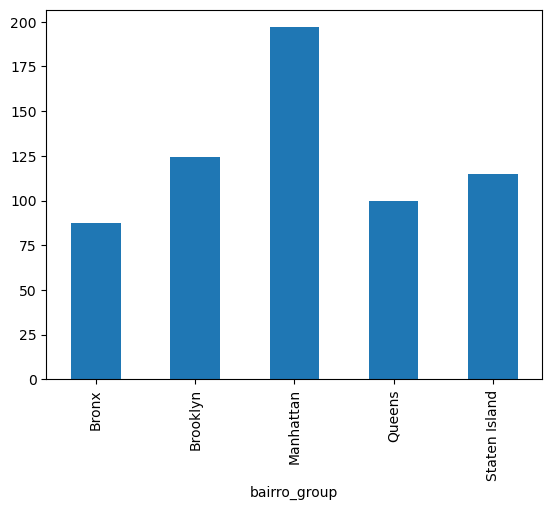

In [91]:
#Média de preço por distritos

#Por distritos, verifica-se que MAnhattan possui a maior média de preço entre os distritos apresentados. Chegando ali aproximadamente na casa dos R$200.
media_preco.plot(kind = 'bar')

<Axes: xlabel='bairro'>

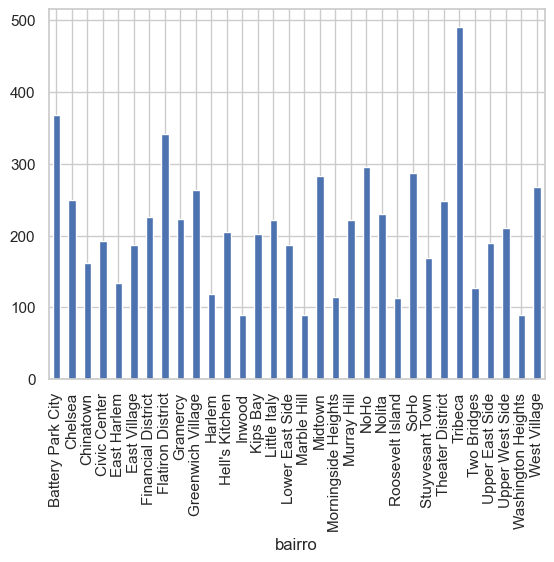

In [202]:
#Média por Bairros

Manhattan = media_preco2.loc["Manhattan"]
Manhattan.plot(kind = 'bar')

<Axes: xlabel='bairro'>

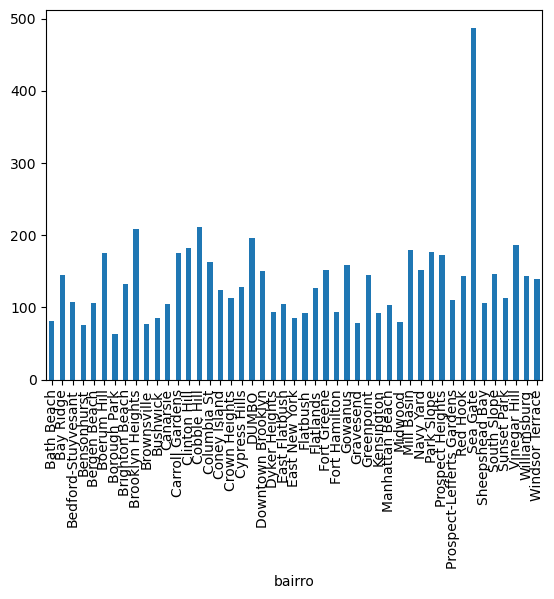

In [35]:
#Brooklyn
Brooklyn = media_preco2.loc["Brooklyn"]
Brooklyn.plot(kind = 'bar')

<Axes: xlabel='bairro'>

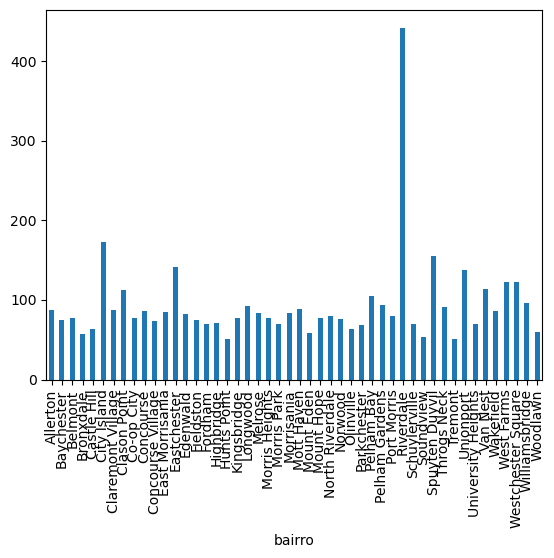

In [36]:
Bronx = media_preco2.loc["Bronx"]
Bronx.plot(kind = 'bar')

<Axes: xlabel='bairro'>

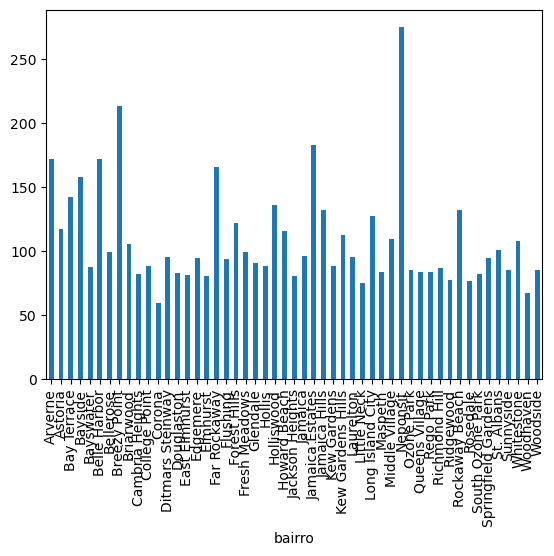

In [37]:
Queens = media_preco2.loc["Queens"]
Queens.plot(kind = 'bar')

<Axes: xlabel='bairro'>

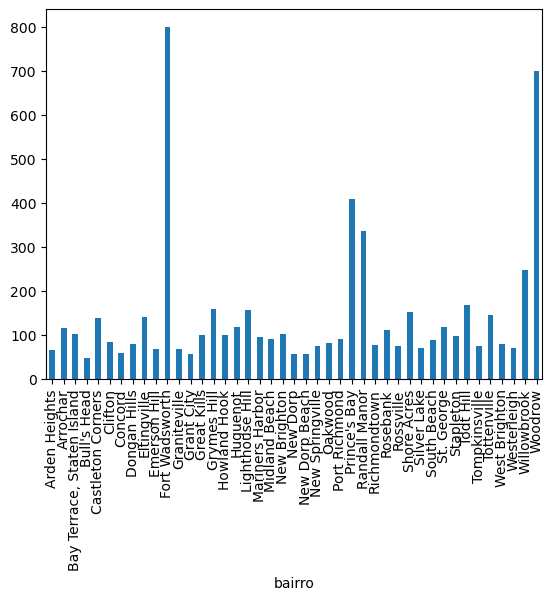

In [51]:
Staten = media_preco2.loc["Staten Island"]
Staten.plot(kind='bar')


In [42]:
#Olhando para os gráficos de barra por distrito, nota-se que, embora Manhattan tenham bairros com valores altos como 'Tribeca' e "Battery Park City", as faixas de valores são bem distribuidas com diversos bairros com valores até $100, de $100 - $200 e mais de $200.
#Outros bairros como Brooklyn, Bronx e Staten Island tem suas médias puxadas por alguns bairros cujo os valores são discrepantes. Staten Island por exemplo, tem 4 bairros acima de $300 (2 acima de $600), enquando o restante dos bairros não passa de $200 a diária. 

bairro_group
Bronx             65.0
Brooklyn          90.0
Manhattan        150.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64
bairro_group
Bronx             87.496792
Brooklyn         124.381983
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


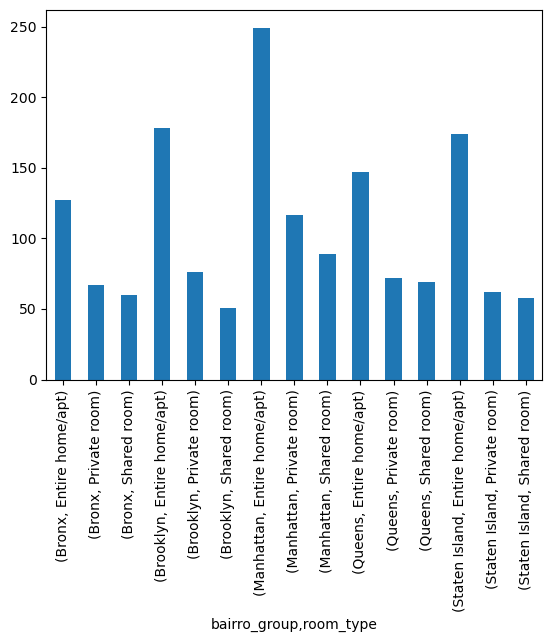

In [55]:
#Valores de tipo de locação por bairro

#Os valores mostram que os valores mais altos ficam para os aluguéis inteiros (apartamento e casas), principalmente em Manhattan. Olhando para o restante dos tipos de locação, nota-se que para o bairro de Manhattan, eles são mais altos que os demais. 
media_roomtype = df.groupby(['bairro_group','room_type'])['price'].mean().plot.bar()


In [31]:
#Manhattan
#Olhando para os dados dos tipos de quarto, os valores para os apartamentos e casas inteiras predominam como os mais altos. Entretando, nota-se alguns pontos:
#Em diversos bairros como 'Financial District", "In Wood", "Noho" a média de valor dos quartos compartilhados é maior que a média de valores de um 'Private Room'. 

#O valor do apartamento em Battery Park e Tribeca são os mais altos do distrito, isso deve ser um dos fatores cujo a média dos valores do bairro é mais alta. 

media_roomtype2 = df.groupby(['bairro_group', 'bairro', 'room_type'])['price'].mean()
MRoom_type = media_roomtype2.loc['Manhattan']
print(MRoom_type.to_string())

bairro               room_type      
Battery Park City    Entire home/apt    488.541667
                     Private room       105.904762
                     Shared room         55.000000
Chelsea              Entire home/apt    283.262195
                     Private room       156.741007
                     Shared room        140.666667
Chinatown            Entire home/apt    211.842857
                     Private room        95.006410
                     Shared room         61.500000
Civic Center         Entire home/apt    226.428571
                     Private room       120.941176
East Harlem          Entire home/apt    189.545267
                     Private room        91.701365
                     Shared room         65.044444
East Village         Entire home/apt    226.305983
                     Private room       118.333333
                     Shared room         84.086957
Financial District   Entire home/apt    242.750000
                     Private room       165.6

In [64]:
#Brooklyn
#Para o Brooklyn o padrão de valores mais altos para apartamentos e casas inteiras se repetem (Alguns valores como Sea Gate ($649) chamam atenção inclusive). Exceto para alguns bairros como "Vinegar Hill", onde o valor do quarto compartilhado é o mais alto. Embora nós não vamos entrar em detalhes, dado o padrão de valores, esse tipo de discrepancia pode ser caracterizado por algum outlier. 

media_roomtype2 = df.groupby(['bairro_group', 'bairro', 'room_type'])['price'].mean()
BRoom_type = media_roomtype2.loc['Brooklyn']
print(BRoom_type.to_string())

bairro                     room_type      
Bath Beach                 Entire home/apt    118.142857
                           Private room        56.300000
Bay Ridge                  Entire home/apt    216.757143
                           Private room        74.630769
                           Shared room         56.833333
Bedford-Stuyvesant         Entire home/apt    154.780641
                           Private room        73.296860
                           Shared room         50.376471
Bensonhurst                Entire home/apt    101.000000
                           Private room        59.534884
                           Shared room         47.000000
Bergen Beach               Entire home/apt    110.250000
                           Private room        92.500000
Boerum Hill                Entire home/apt    203.117647
                           Private room        87.625000
                           Shared room         47.000000
Borough Park               Entire home/apt   

In [66]:
# Analisando os valores para o restante dos distritos, encontramos alguns pontos: 
# Bronx - OS valores seguem todos uma média. Um valos discrepante são as médias dos Private Room e Shared Room em Riverdale (ambos acima de $800). 

#Em State Island você encontra valores para apartamentos e casas inteiras no maior valor. 
#1 - Fort Wadsworth (Entire Home/Apt - $800)
# 2 - Prince's Bay (Entire Home - acima de $500
# 3 - Randall Manor - Enrite Home acima de $651
# 4 - Woodrow - Entire Home acima de $700

#Embora careça de mais informações, podemos trabalhar até o momento com a hipótese de que esses valores são outliers, dados as médias dos outros bairros. 

media_roomtype2 = df.groupby(['bairro_group', 'bairro', 'room_type'])['price'].mean()
BrRoom_type = media_roomtype2.loc['Bronx']
print(BrRoom_type.to_string())

media_roomtype2 = df.groupby(['bairro_group', 'bairro', 'room_type'])['price'].mean()
QRoom_type = media_roomtype2.loc['Queens']
print(QRoom_type.to_string())

media_roomtype2 = df.groupby(['bairro_group', 'bairro', 'room_type'])['price'].mean()
SRoom_type = media_roomtype2.loc['Staten Island']
print(SRoom_type.to_string())

bairro              room_type      
Allerton            Entire home/apt    123.062500
                    Private room        65.769231
Baychester          Entire home/apt     90.333333
                    Private room        64.250000
Belmont             Entire home/apt    228.666667
                    Private room        52.947368
                    Shared room         79.500000
Bronxdale           Entire home/apt     77.500000
                    Private room        40.800000
                    Shared room         57.000000
Castle Hill         Entire home/apt     93.500000
                    Private room        38.600000
City Island         Entire home/apt    235.272727
                    Private room        75.142857
Claremont Village   Entire home/apt    130.500000
                    Private room        70.250000
Clason Point        Entire home/apt    171.750000
                    Private room        82.636364
                    Shared room         42.500000
Co-op City    

In [95]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,...,Loteria,Onibus,Galeria,Trem,Museu,Bike,Jardim,Universidades,Estacionamentos,Bebedouros
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,14,7,7,0,1,0,0,1,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,5,10,0,0,0,0,0,0,0,5
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,0,3,0,0,0,0,0,0,0,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,11,9,0,0,0,0,0,0,0,4
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,10,9,4,0,0,0,0,0,0,2


In [101]:
#Média infraestrutura por bairro
onibus_media = df.groupby(['bairro_group'])['Onibus'].mean()
metro_media = df.groupby(['bairro_group'])['Metro'].mean()
trem_media = df.groupby(['bairro_group'])['Trem'].mean()
bike_media = df.groupby(['bairro_group'])['Bike'].mean()
jardim_media = df.groupby(['bairro_group'])['Jardim'].mean()
universidades_media = df.groupby(['bairro_group'])['Universidades'].mean()
estacionamentos_media = df.groupby(['bairro_group'])['Estacionamentos'].mean()
bebedouros_media = df.groupby(['bairro_group'])['Bebedouros'].mean()
wifi_media = df.groupby(['bairro_group'])['wifi'].mean()

#Visualizar Dados
print(onibus_media)
print(metro_media)
print(trem_media)
print(bike_media)
print(jardim_media)
print(universidades_media)
print(estacionamentos_media)
print(bebedouros_media)
print(wifi_media)



bairro_group
Bronx            3.477544
Brooklyn         3.125056
Manhattan        6.925488
Queens           3.095305
Staten Island    1.262735
Name: Onibus, dtype: float64
bairro_group
Bronx            0.507791
Brooklyn         0.706462
Manhattan        1.184064
Queens           0.472291
Staten Island    0.128686
Name: Metro, dtype: float64
bairro_group
Bronx            0.000000
Brooklyn         0.019151
Manhattan        0.008818
Queens           0.042534
Staten Island    0.000000
Name: Trem, dtype: float64
bairro_group
Bronx            0.021998
Brooklyn         0.027459
Manhattan        0.044596
Queens           0.036710
Staten Island    0.016086
Name: Bike, dtype: float64
bairro_group
Bronx            0.000000
Brooklyn         0.001244
Manhattan        0.000000
Queens           0.003000
Staten Island    0.000000
Name: Jardim, dtype: float64
bairro_group
Bronx            0.034830
Brooklyn         0.088743
Manhattan        0.344813
Queens           0.007413
Staten Island    0.010724
Na

In [102]:
#Insfraestrutura

#Primeiramente, tiramos a média da quantidade de pontos de infraestrutura que temos a cada 500 metros por tipo de locação. Ou seja, 
#a média de pontos de onibus, estações de metro e de trem, estacionamentos publicos de automoveis e de bike, universidades e colleges, bebedouros publicos e pontos de wifi temos a cada 500 metros.
#Os resultados indicam que Manhattan possui, por unidade, a maior média de infraestrutura publica em um raio de 500 metros. Por exemplo, uma unidade de tipo de aluguel possui em média, mais de 6 pontos de onibus disponíveis em 500 metros e quase 2 estações de metrô.

#Sob uma perspectiva mais qualitativa, podemos criar uma hipótese de que os preços em Manhattan podem ser mais altos pois o acesso a infraestrutura pública é maior naquela região. 


In [107]:
#Acesso a pontos de consumo e bens culturais
loteria_media = df.groupby(['bairro_group'])['Loteria'].mean()
galeria_media = df.groupby(['bairro_group'])['Galeria'].mean()
museu_media = df.groupby(['bairro_group'])['Museu'].mean()
farmers_media = df.groupby(['bairro_group'])['Farmers'].mean()
farmacia_media = df.groupby(['bairro_group'])['Farmacias'].mean()
teatro_media = df.groupby(['bairro_group'])['teatro'].mean()

#Visualizacao
print(loteria_media)
print(farmacia_media)
print(farmers_media)
print(galeria_media)
print(museu_media)
print(teatro_media)

bairro_group
Bronx            0.002750
Brooklyn         0.000000
Manhattan        8.676285
Queens           0.000000
Staten Island    0.000000
Name: Loteria, dtype: float64
bairro_group
Bronx            0.362053
Brooklyn         0.337810
Manhattan        0.782282
Queens           0.321920
Staten Island    0.453083
Name: Farmacias, dtype: float64
bairro_group
Bronx            0.179652
Brooklyn         0.174999
Manhattan        0.404552
Queens           0.058419
Staten Island    0.056300
Name: Farmers, dtype: float64
bairro_group
Bronx            0.026581
Brooklyn         0.506989
Manhattan        6.538618
Queens           0.150371
Staten Island    0.000000
Name: Galeria, dtype: float64
bairro_group
Bronx            0.045830
Brooklyn         0.040989
Manhattan        0.684641
Queens           0.046947
Staten Island    0.061662
Name: Museu, dtype: float64
bairro_group
Bronx            0.000000
Brooklyn         0.000000
Manhattan        1.840728
Queens           0.012884
Staten Island    0

In [ ]:
#Acesso a Bens de Consumo

#A Hipótese anterior é ainda reforçada a medida que nós encontramos que a média de locais de consumo e cultural a cada 500 metros, é muito maior no distrito de Manhattan do que nos outros distritos. 
#Alguns chamam bastante atenção, como "loteria" (que aqui, podemos utilizar como uma proxy de comércios também, haja visto que é nesses lugares que é realizado a compra desse produto), galerias de arte e museus. 

#Em resumo, podemos encontrar que o bairro cujo os preços são os mais altos, é também os bairros onde o acesso a infraestrutura e a bens de consumo é muito mais disponível do que em outros distritos. 

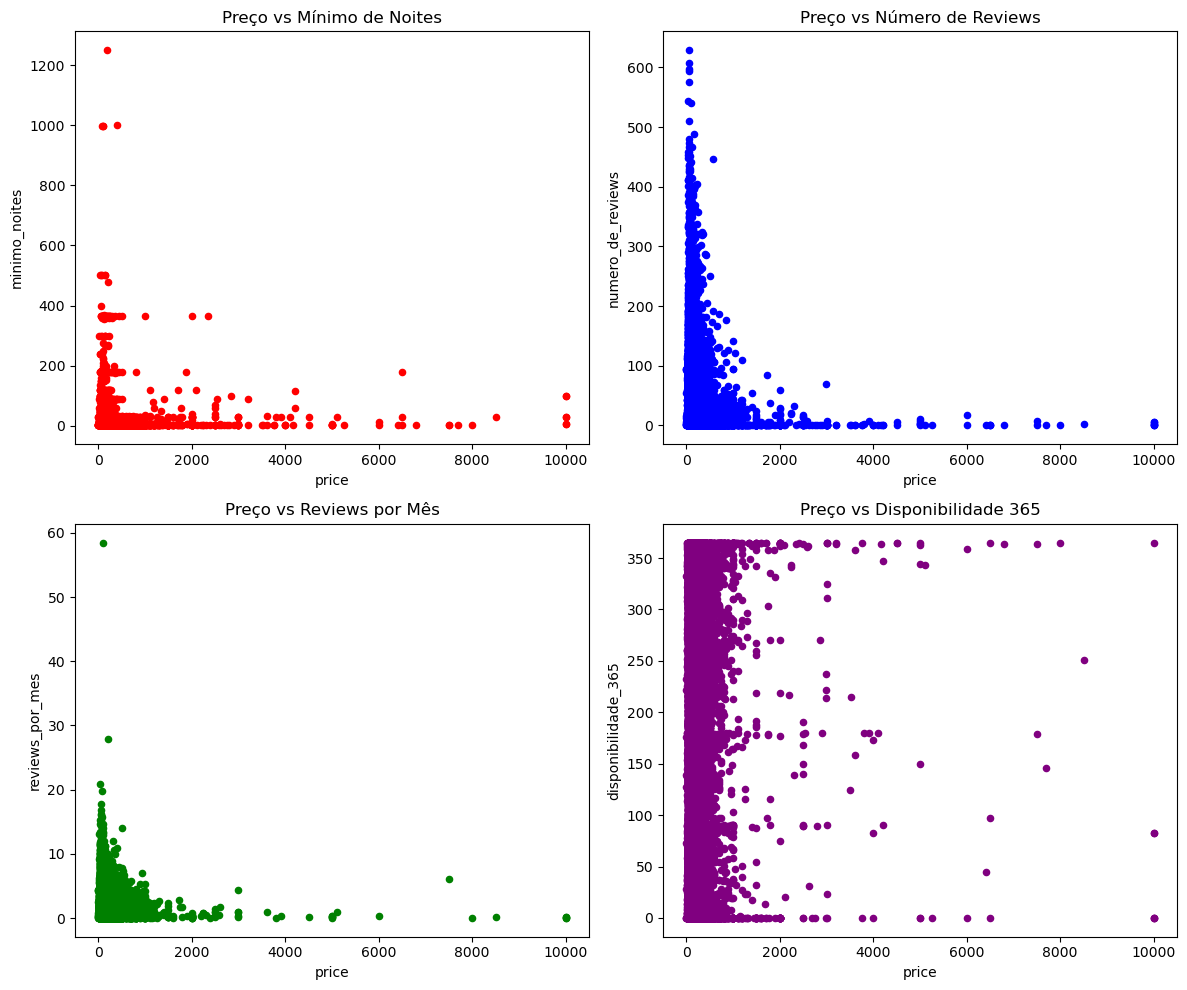

In [112]:
#Dados do apartamento
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
df.plot(kind="scatter", x="price", y="minimo_noites", color="red", ax=axes[0, 0], title="Preço vs Mínimo de Noites")
df.plot(kind="scatter", x="price", y="numero_de_reviews", color="blue", ax=axes[0, 1], title="Preço vs Número de Reviews")
df.plot(kind="scatter", x="price", y="reviews_por_mes", color="green", ax=axes[1, 0], title="Preço vs Reviews por Mês")
df.plot(kind="scatter", x="price", y="disponibilidade_365", color="purple", ax=axes[1, 1], title="Preço vs Disponibilidade 365")
plt.tight_layout()
plt.show()


In [ ]:
#Verificando as relações, não parece haver uma relação linear entre preço e as variáveis disponíveis disponíveis no dataset. Ou seja, a ideia de buscar mais variáveis para além das que já possuímos pode ser importante. 
#Importante frisar que aqui, não excluímos outliers e que a idéia foi simplesmente explorar o dataset. 

In [123]:
#Preço por médias de disponibilidade, minimo de noites e reviews (totais e mensais)

#como não encontramos uma relação linear, pensamos em dividir as colunas pela média e pegar o grupo abaixo da média (L - lower) e acima da média (H - Higher), e verificar se existe uma diferença de preços para baixo ou acima da média. 

#Medias
Media_Minimo = df["minimo_noites"].mean()
Media_Numero = df["numero_de_reviews"].mean()
Media_Reviews = df["reviews_por_mes"].mean()
Media_Disponibilidade = df["disponibilidade_365"].mean()

# Definir valores altos (H) e baixos (L) para cada variável
MinimoH = df[df["minimo_noites"] > Media_Minimo]
MinimoL = df[df["minimo_noites"] <= Media_Minimo]
media_preco_MinimoH = MinimoH["price"].mean()
media_preco_MinimoL = MinimoL["price"].mean()

NumeroH = df[df["numero_de_reviews"] > Media_Numero]
NumeroL = df[df["numero_de_reviews"] <= Media_Numero]
media_preco_NumeroH = NumeroH["price"].mean()
media_preco_NumeroL = NumeroL["price"].mean()

ReviewsH = df[df["reviews_por_mes"] > Media_Reviews]
ReviewsL = df[df["reviews_por_mes"] <= Media_Reviews]
media_preco_ReviewsH = ReviewsH["price"].mean()
media_preco_ReviewsL = ReviewsL["price"].mean()

DisponibilidadeH = df[df["disponibilidade_365"] > Media_Disponibilidade]
DisponibilidadeL = df[df["disponibilidade_365"] <= Media_Disponibilidade]
media_preco_DisponibilidadeH = DisponibilidadeH["price"].mean()
media_preco_DisponibilidadeL = DisponibilidadeL["price"].mean()

# Exibir as médias
print(f"Média de mínimo de noites: {Media_Minimo}")
print(f"Média de número de reviews: {Media_Numero}")
print(f"Média de reviews por mês: {Media_Reviews}")
print(f"Média de disponibilidade 365: {Media_Disponibilidade}")


Média de mínimo de noites: 7.030085491062298
Média de número de reviews: 23.27475763897411
Média de reviews por mês: 1.3732513773750066
Média de disponibilidade 365: 112.77616885507425


In [132]:
#Calculos 

#Aqui a ideia é fazer um teste t para os dois grupos usando o preço como variável dependente. Vamos verificar se há uma significância e se podemos tirar algum tipo de informação a partir das diferenças. 

from scipy import stats
import pandas as pd

# Diferença de preço
diff_minimo = MinimoH["price"].mean() - MinimoL["price"].mean()
diff_reviews = NoitesH["price"].mean() - NoitesL["price"].mean()
diff_reviews_mes = ReviewsH["price"].mean() - ReviewsL["price"].mean()
diff_disponibilidade = DisponibilidadeH["price"].mean() - DisponibilidadeL["price"].mean()

# Testes t 
t_minimo, p_minimo = stats.ttest_ind(MinimoH["price"], MinimoL["price"], equal_var=False)
t_reviews, p_reviews = stats.ttest_ind(NoitesH["price"], NoitesL["price"], equal_var=False)
t_reviews_mes, p_reviews_mes = stats.ttest_ind(ReviewsH["price"], ReviewsL["price"], equal_var=False)
t_disponibilidade, p_disponibilidade = stats.ttest_ind(DisponibilidadeH["price"], DisponibilidadeL["price"], equal_var=False)

# Resultados
dados_teste_t = {
    "Comparação": [
        "Mínimo de Noites (H vs L)",
        "Número de Reviews (H vs L)",
        "Reviews por Mês (H vs L)",
        "Disponibilidade 365 (H vs L)"
    ],
    "T-Valor": [t_minimo, t_reviews, t_reviews_mes, t_disponibilidade],
    "P-Valor": [p_minimo, p_reviews, p_reviews_mes, p_disponibilidade],
    "Diferença Média de Preço": [
        diff_minimo,
        diff_reviews,
        diff_reviews_mes,
        diff_disponibilidade
    ]
}

df_teste_t = pd.DataFrame(dados_teste_t)
print(df_teste_t)


                     Comparação    T-Valor       P-Valor  \
0     Mínimo de Noites (H vs L)   4.428313  9.619756e-06   
1    Número de Reviews (H vs L) -15.430287  1.395194e-53   
2      Reviews por Mês (H vs L)  -5.584006  2.366397e-08   
3  Disponibilidade 365 (H vs L)  15.218833  4.095464e-52   

   Diferença Média de Preço  
0                 19.218596  
1                -27.028941  
2                -10.164499  
3                 36.443506  


In [134]:
#Os grupos comparados possuem uma diferença estatistica significativa a P < 0.05. Quando o minimo de noites e a disponibilidade ficam acima da média, o preço tende a ser mais algo que o grupo abaixo da média. Nesse sentido, quando um anúncio está acima de 7 noite e com uma disponibilidade maior que 112 dias, o valor tende a ser $4.42 e $15.21 maior respectivamente.
#Entretanto, quando quanto maior o número de reviews gerais e por mês, menor o valor médio das acomodações. Ou seja, podemos criar uma hipótese de que os quartos que possuem maior numero de reviews, são aqueles que possuem um valor menor. 

In [156]:
#Existe algum padrão no texto do nome do local para lugares de mais alto valor? 

#Bem a ideia aqui é utilizar um modelo bastante utilizado na academia para pesquisa qualitativa e tentar compreender se existem um conjunto de palavras que formam os anuncios de preço mais elevado. 
#Primeiramente, vamos recortar os anuncios que possuem valor mais alto e criar um novo dataframe (df3). Vamos pegar especificamente valores cujo o preço está acima de 3 desvios padrão.


In [162]:
#Pegando valores com desvios acima de 3 
from scipy.stats import zscore

# Calcular o Z-score diretamente no DataFrame original e filtrar as linhas
df['z_score'] = zscore(df['price'])
df3 = df[df['z_score'] > 3]

# Exibir um resumo do novo DataFrame com valores acima de 3 desvios padrão
print(df3)

             id                                               nome    host_id  \
495      174966              Luxury 2Bed/2.5Bath Central Park View     836168   
761      273190          6 Bedroom Landmark West Village Townhouse     605463   
945      363673                   Beautiful 3 bedroom in Manhattan     256239   
1104     468613   $ (Phone number hidden by Airbnb) weeks - room f    2325861   
1413     634353                Luxury 1Bed with Central Park Views     836168   
...         ...                                                ...        ...   
48300  36186719           Private Bedroom in the Heart of Chelsea!  268920555   
48303  36189195      Next to Times Square/Javits/MSG! Amazing 1BR!  270214015   
48304  36189257             2BR Near Museum Mile! Upper East Side!  272166348   
48522  36308562  Tasteful & Trendy Brooklyn Brownstone, near Train  217732163   
48534  36311055     Stunning & Stylish Brooklyn Luxury, near Train  245712163   

           host_name bairro

In [163]:
#Os resultados mostram que são 388 valores linhas, com preços acima de 3 desvios padrão. Fazendo uma rápida análise temos, que o preço médio é de pouco mais de $1600, com o valor maximo chegando em $10.000
df3.describe() 

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,...,Museu,Bike,Jardim,Universidades,Estacionamentos,Bebedouros,Metro,teatro,wifi,z_score
count,3.880000e+02,3.880000e+02,388.000000,388.000000,388.000000,388.000000,388.000000,196.000000,388.000000,388.000000,...,388.000000,388.000000,388.0,388.000000,388.0,388.000000,388.000000,388.000000,388.000000,388.000000
mean,1.897967e+07,7.097079e+07,40.733587,-73.975554,1899.695876,13.358247,7.927835,0.884745,3.713918,186.858247,...,0.791237,0.054124,0.0,0.371134,0.0,4.536082,1.190722,1.610825,1.487113,7.274390
std,1.202956e+07,8.327660e+07,0.044135,0.040408,1659.006591,38.760552,18.483877,1.154057,11.601172,150.538819,...,1.526756,0.237686,0.0,0.829926,0.0,4.551881,1.134252,4.319368,1.542621,6.908090
min,1.749660e+05,8.730000e+03,40.530760,-74.202950,875.000000,1.000000,0.000000,0.020000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.007565
25%,6.961303e+06,7.054422e+06,40.715395,-73.997110,1000.000000,1.000000,0.000000,0.170000,1.000000,1.500000,...,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.528064
50%,1.971695e+07,2.691635e+07,40.736665,-73.982355,1200.000000,2.000000,1.000000,0.405000,1.000000,180.000000,...,0.000000,0.000000,0.0,0.000000,0.0,3.000000,1.000000,0.000000,1.000000,4.360862
75%,3.092980e+07,1.253204e+08,40.760802,-73.964080,2000.000000,6.000000,6.000000,1.000000,2.000000,358.000000,...,1.000000,0.000000,0.0,0.000000,0.0,6.000000,2.000000,2.000000,2.000000,7.692056
max,3.631106e+07,2.721663e+08,40.886710,-73.741300,10000.000000,365.000000,141.000000,7.020000,121.000000,365.000000,...,7.000000,2.000000,0.0,5.000000,0.0,22.000000,5.000000,36.000000,9.000000,41.003990


In [164]:
#A partir desse recorte, vamos realizar uma modelagem de topicos utilizando o nome dos anúncios e procurando os o conjunto de palavras que mais formam esses nomes. 
#Para mais informações: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

# Importar as bibliotecas necessárias
import pandas as pd
import os
import re


In [166]:
#Para iniciar, precisamos realizar um pre processamento dos dados. Retiraremos toda pontuação presente na coluna nomes e também colocaremos todas as palavras em letra minuscula. 
# Usando .loc para evitar o SettingWithCopyWarning
df3.loc[:, 'nome_processed'] = df3['nome'].map(lambda x: re.sub(r'[,.!?]', '', str(x)))  # Remove pontuação
df3.loc[:, 'nome_processed'] = df3['nome_processed'].map(lambda x: x.lower())  # Converte para minúsculas

# Visualizar as primeiras linhas
print(df3[['nome', 'nome_processed']].head())



                                                  nome  \
495              Luxury 2Bed/2.5Bath Central Park View   
761          6 Bedroom Landmark West Village Townhouse   
945                   Beautiful 3 bedroom in Manhattan   
1104  $ (Phone number hidden by Airbnb) weeks - room f   
1413               Luxury 1Bed with Central Park Views   

                                        nome_processed  
495               luxury 2bed/25bath central park view  
761          6 bedroom landmark west village townhouse  
945                   beautiful 3 bedroom in manhattan  
1104  $ (phone number hidden by airbnb) weeks - room f  
1413               luxury 1bed with central park views  


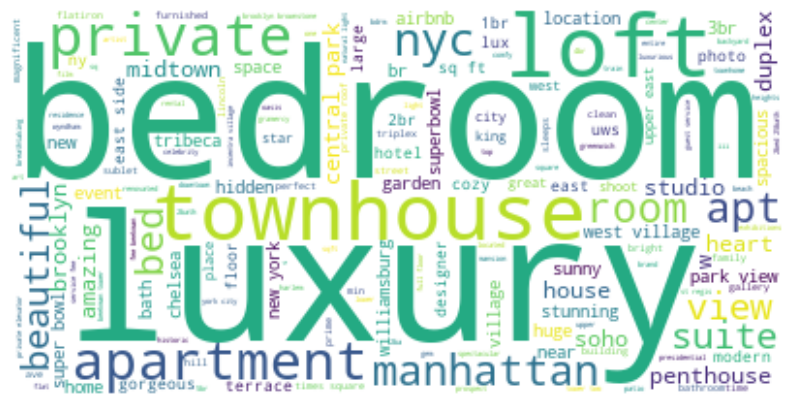

In [167]:
#Vamos realizar uma análise exploratória dos dados a partir de uma nuvem de palavras. Vamos ver quais as principais palavras que aparecem nesse conjunto de nome. 
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

long_string = ','.join(list(df3['nome_processed'].dropna().values))
wordcloud = WordCloud(
    background_color="white",
    max_words=5000,
    contour_width=3,
    contour_color='steelblue'
)

# Gerar a WordCloud
wordcloud.generate(long_string)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
#Logo podemos ver que Luxury é uma das palavras mais citadas. Outra são 'townhouse' que é uma espécie de condominio. "private", "loft" e "manhattam" são outras palavras que se destacam. Por "Manhattam" podemos salientar que esse é um dos distritos cujo preço dos imóveis são os mais altos. 

In [170]:
#Aqui vamos continuar com o processamento de dados próprio da LDA. Basicamente vamos limpar stopwords (palavras que não tem sentido separado), pontuações e vamos tokenizar os textos. 

import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from pprint import pprint


# Baixar os stopwords da biblioteca NLTK
nltk.download('stopwords')

# Definir as stopwords em inglês e adicionar palavras adicionais
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])  # Palavras extras para ignorar

# Função para tokenizar os textos (removendo pontuação e deixando em minúsculas)
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remove pontuação

# Função para remover stopwords dos textos
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Converter a coluna 'nome_processed' para uma lista de textos
data = df3['nome_processed'].dropna().values.tolist()

# Tokenizar os textos (transformar em listas de palavras)
data_words = list(sent_to_words(data))

# Remover stopwords dos textos tokenizados
data_words = remove_stopwords(data_words)

# Visualizar as primeiras palavras processadas
print(data_words[:1][0][:30])  # Mostra as 30 primeiras palavras do primeiro documento

# Criar o Dicionário (id2word) com os textos processados
id2word = corpora.Dictionary(data_words)

# Criar o Corpus (bag of words) com o Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

# Visualizar os primeiros 30 pares (termo, frequência) do primeiro documento
print(corpus[:1][0][:30])

# Opcional: Ver a representação das palavras no primeiro documento
for word_id, freq in corpus[:1][0][:30]:
    print(f"{id2word[word_id]}: {freq}")

# Número de tópicos
num_topics = 10

# Criar o modelo LDA
lda_model = gensim.models.LdaMulticore(
    corpus=corpus,         # Corpus com Term-Document Frequency
    id2word=id2word,       # Dicionário de mapeamento ID -> Palavra
    num_topics=num_topics, # Número de tópicos a identificar
    workers=4,             # Número de threads (paralelismo)
    random_state=42,       # Garantir reproducibilidade
    chunksize=100,         # Tamanho do lote de documentos
    passes=10,             # Quantidade de vezes que o corpus será iterado
    iterations=100         # Iterações para ajuste do modelo
)

# Exibir os tópicos gerados pelo modelo
pprint(lda_model.print_topics())

# Obter os tópicos para cada documento no corpus
doc_lda = lda_model[corpus]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['luxury', 'bed', 'bath', 'central', 'park', 'view']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]
bath: 1
bed: 1
central: 1
luxury: 1
park: 1
view: 1
[(0,
  '0.033*"loft" + 0.033*"midtown" + 0.031*"designer" + 0.030*"bed" + '
  '0.019*"manhattan" + 0.015*"bath" + 0.014*"br" + 0.014*"townhouse" + '
  '0.014*"modern" + 0.014*"brooklyn"'),
 (1,
  '0.049*"br" + 0.035*"apt" + 0.034*"ba" + 0.030*"manhattan" + '
  '0.023*"superbowl" + 0.022*"private" + 0.021*"williamsburg" + 0.021*"super" '
  '+ 0.017*"bowl" + 0.016*"duplex"'),
 (2,
  '0.034*"nyc" + 0.029*"luxury" + 0.028*"bath" + 0.027*"apartment" + '
  '0.022*"bedroom" + 0.022*"flatiron" + 0.018*"superbowl" + 0.018*"views" + '
  '0.017*"sq" + 0.017*"breathtaking"'),
 (3,
  '0.101*"village" + 0.056*"west" + 0.047*"townhouse" + 0.030*"private" + '
  '0.029*"east" + 0.028*"bedroom" + 0.019*"br" + 0.018*"soho" + 0.017*"ny" + '
  '0.014*"apartment"'),
 (4,
  '0.047*"luxury" + 0.046*"bedroom" + 0.043*"brooklyn" + 0.036*"manhattan" + '
  '0.03

In [171]:
#Por fim criamos o modelo de tópicos. Criamos 10 tópicos com as palavras mais utilizadas. 

import os
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

# Criar o diretório './results/' se ele não existir
os.makedirs('./results', exist_ok=True)

# Preparar os dados do LDAvis
LDAvis_data_filepath = './results/ldavis_prepared_10'
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Salvar os dados preparados
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# Carregar os dados preparados
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# Exibir o visualizador interativo
pyLDAvis.display(LDAvis_prepared)


In [ ]:
#Análise qualitativa dos 3 principais clusters

#Cluster 1 (tópicos 3, 8 e 7): nesse tópico temos uma prevalência de termos como> luxo, distritos (manhattam e brooklyn), indicativos que eles ficam em condominio (townhouse), que são privados (privates) e etc. 
#Cluster 2 (tópicos 1 e 10): Temos ali duas palavras soltas que se juntas mostram a prevalência de lugares próximos ao central park, o topico 1 mostra que são apartamentos, estudios e lofts e que são modernos, luxuosos e que ficam no centro da cidade
#Cluster 3 (tópico 2): podemos ver que locais em palavras como loft, luxo e privado são as principais caracteristicas desses apartamentos. É possível ver também bairros como tribeca (local que possui as hospedagens mais caras em manhattam) e Soho (bairro com muitas lojas de roupa)

In [32]:
#Questão 2) Responda também às seguintes perguntas: 
#a. Supondo que uma pessoa esteja pensando em investir em um  apartamento para alugar na plataforma, onde seria mais indicada a  compra?
#No distrito de manhattan de modo geral é onde a média de preços para todos os tipos de locação é mais alto e é onde a média de acesso a infraestrutura/bens de consumo é mais abundante.  Nesse sentido, com os dados que temos em mãos, podemos dizer que esse é o distrito onde a compra pode ser mais recomendada.

#b. O número mínimo de noites e a disponibilidade ao longo do ano  interferem no preço? 
#De modo geral, não existe uma relação entre as variáveis. Entretanto, quando tiramos a média do minimo de noites e da disponibilidade ao longo do ano e separamos em grupos acima e abaixo da média, notamos que a média de preços é maior quando o número de noites e a disponibilidade estão acima da média. 

#c. Existe algum padrão no texto do nome do local para lugares de mais  alto valor?   
#Encontramos um padrão de palavras em lugares de alto valor que são "luxo", "manhattam e brooklyn", 'loft", "privado", "central park" e outros tópicos.  

In [ ]:
#O catboosterregressor tem entre todos os modelos, o melhor desempenho tanto no r² quanto no mse. Utilizaremos ele para prever os dados de preço no exercício indicado. 